In [2]:
import pyodbc
import pandas as pd

# Connect to your SQL Server database
conn = pyodbc.connect(
    'DRIVER={SQL Server};SERVER=SHOHAD\SQLEXPRESS;DATABASE=TechSalariesDB;Trusted_Connection=yes;'
)

# Query your cleaned view
query = "SELECT * FROM Cleaned_Salaries"
df = pd.read_sql(query, conn)

# Show first 5 rows
df.head()


C:\Users\towhi\AppData\Local\Temp\ipykernel_8912\271339700.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,salary_range,employee_residence,remote_ratio,company_location,company_size
0,2024,Senior,FT,Data Architect,170955,USD,170955,High,US,0,US,Medium
1,2024,Senior,FT,Data Architect,130270,USD,130270,Medium,US,0,US,Medium
2,2024,Mid,FT,Insight Analyst,92144,USD,92144,Medium,US,100,US,Medium
3,2024,Mid,FT,Insight Analyst,57616,USD,57616,Medium,US,100,US,Medium
4,2024,Senior,FT,Lead Engineer,201600,USD,201600,High,US,100,US,Medium


In [3]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40332 entries, 0 to 40331
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           40332 non-null  int64 
 1   experience_level    40332 non-null  object
 2   employment_type     40332 non-null  object
 3   job_title           40332 non-null  object
 4   salary              40332 non-null  int64 
 5   salary_currency     40332 non-null  object
 6   salary_in_usd       40332 non-null  int64 
 7   salary_range        40332 non-null  object
 8   employee_residence  40332 non-null  object
 9   remote_ratio        40332 non-null  int64 
 10  company_location    40332 non-null  object
 11  company_size        40332 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.7+ MB


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
salary_range          0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

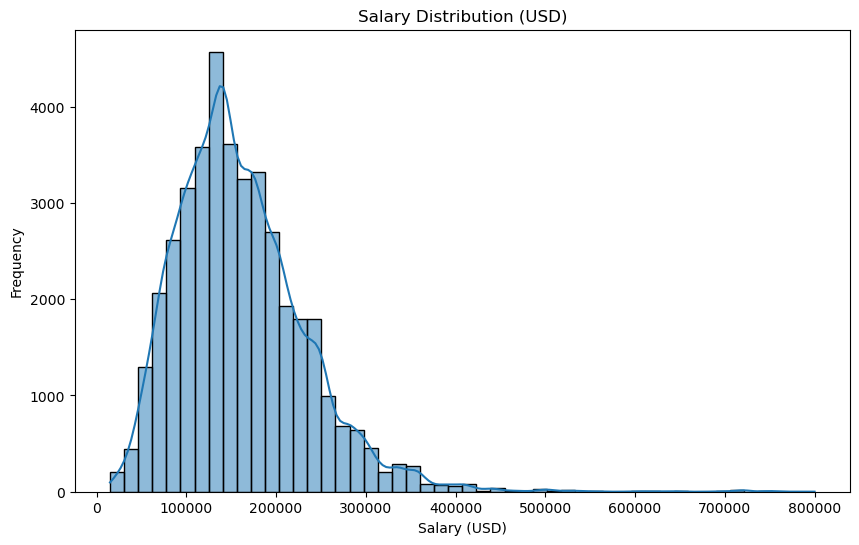

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=50, kde=True)
plt.title('Salary Distribution (USD)')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()


C:\Users\towhi\AppData\Local\Temp\ipykernel_8912\3924211093.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='experience_level', y='salary_in_usd', ci=None)


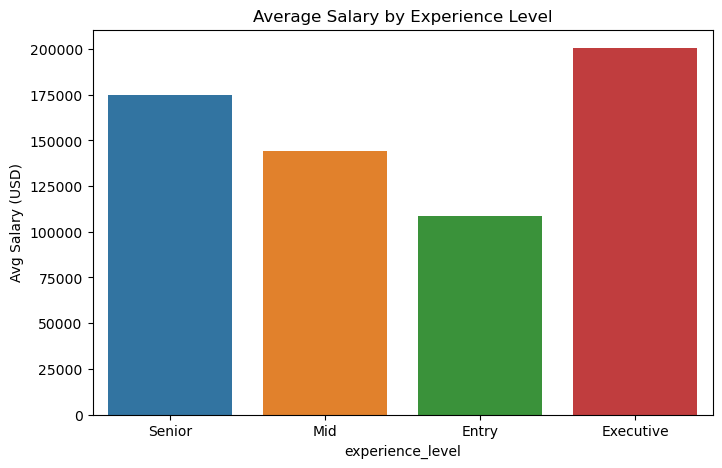

In [6]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='experience_level', y='salary_in_usd', ci=None)
plt.title('Average Salary by Experience Level')
plt.ylabel('Avg Salary (USD)')
plt.show()


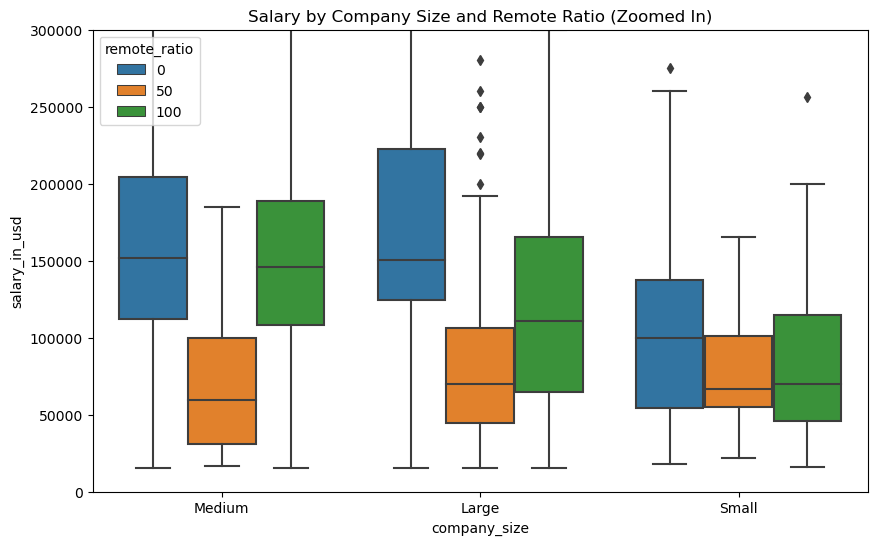

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='company_size', y='salary_in_usd', hue='remote_ratio')
plt.title('Salary by Company Size and Remote Ratio (Zoomed In)')
plt.ylim(0, 300000)  # Limit y-axis
plt.show()



Correlation Analysis

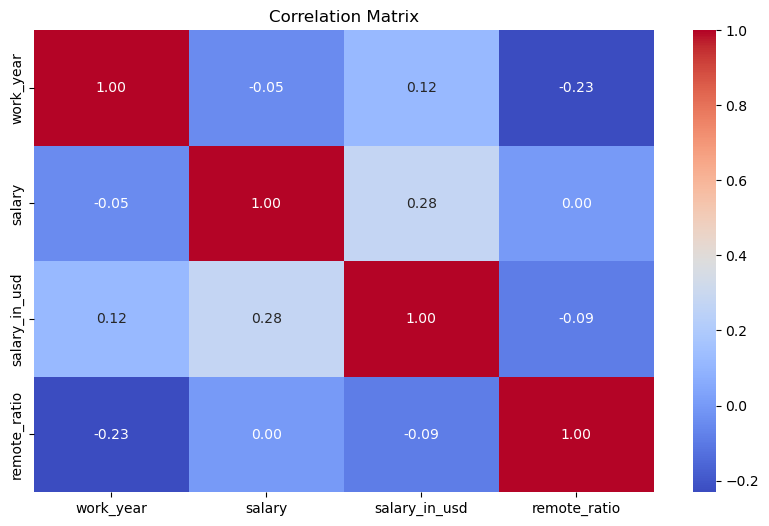

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Salary Trends Over Time

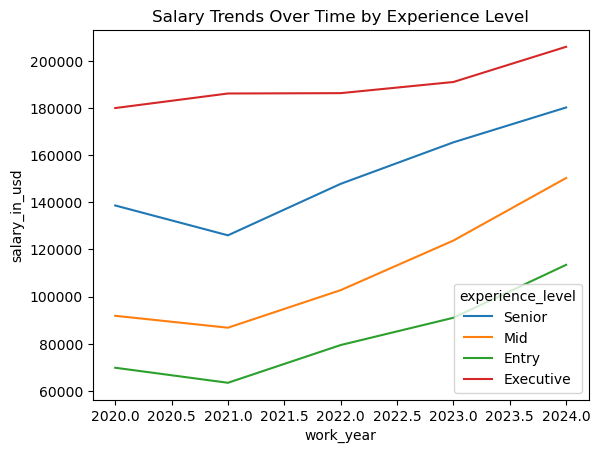

In [15]:
sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='experience_level', errorbar=None)
plt.title('Salary Trends Over Time by Experience Level')
plt.show()


# Statistical Analysis

ANOVA: Do salaries differ by experience level?

In [17]:
from scipy.stats import f_oneway

groups = [group['salary_in_usd'] for name, group in df.groupby('experience_level')]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")


ANOVA F-statistic: 1301.78, p-value: 0.0000


T-Test: Remote vs On-Site

In [18]:
from scipy.stats import ttest_ind

remote = df[df['remote_ratio'] == 100]['salary_in_usd']
onsite = df[df['remote_ratio'] == 0]['salary_in_usd']
t_stat, p_val = ttest_ind(remote, onsite)
print(f"T-test: t = {t_stat:.2f}, p = {p_val:.4f}")


T-test: t = -16.81, p = 0.0000


Cleaned Data for Power BI

In [26]:
df.to_csv('cleaned_salaries.csv', index=False)

